In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import mean_squared_error

In [2]:
df= pd.read_csv('ds_salaries.csv')
df.head()

Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0               JP            S  
2                 GB            50               GB            M  
3                 HN             0               HN            S  
4                 US            50               US            L

In [3]:
sns.distplot(df['work_year'])

C:\Users\HV7\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='work_year', ylabel='Density'>

In [4]:
k = df['experience_level'].value_counts()

In [5]:
k.to_frame().reset_index()

index  experience_level
0    SE               280
1    MI               213
2    EN                88
3    EX                26

In [6]:
sns.boxplot(y="salary", data=df)

<AxesSubplot:ylabel='salary'>

<AxesSubplot:ylabel='salary_in_usd'>

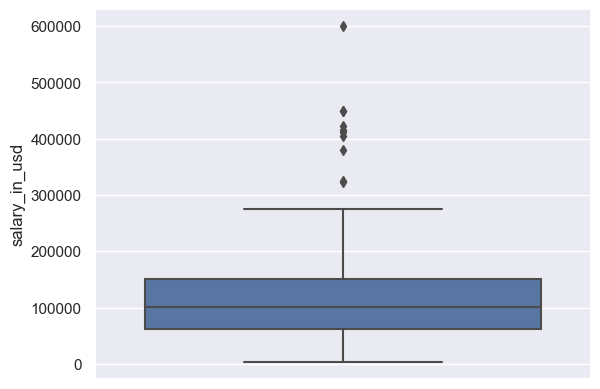

In [7]:
sns.boxplot(y="salary_in_usd", data=df)

<AxesSubplot:xlabel='experience_level', ylabel='salary_in_usd'>

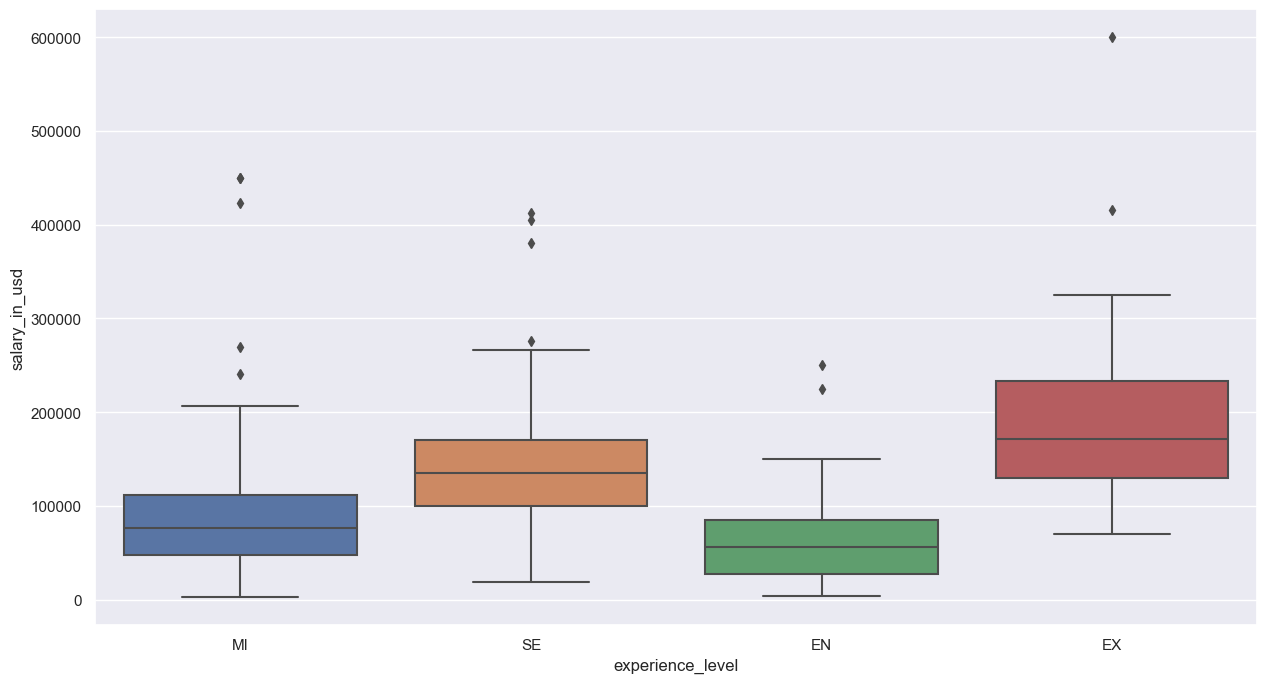

In [8]:
plt.figure(figsize=(15,8))
sns.boxplot(x="experience_level", y="salary_in_usd", data=df)

In [9]:
plt.figure(figsize=(15,8))
sns.boxplot(x="experience_level", y="salary_in_usd",hue='remote_ratio', data=df)

<AxesSubplot:xlabel='experience_level', ylabel='salary_in_usd'>

In [10]:
first_10_job_titles =  df['job_title'].value_counts()[:10].keys()
df_filtered_job_titles = df[df['job_title'].isin(first_10_job_titles)]
df_filtered_job_titles['job_title'].value_counts()

Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Machine Learning Scientist      8
Big Data Engineer               8
Principal Data Scientist        7
Name: job_title, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(job_title, 0, 'Data Scientist'),
  Text(job_title, 0, 'Machine Learning Scientist'),
  Text(job_title, 0, 'Big Data Engineer'),
  Text(job_title, 0, 'Machine Learning Engineer'),
  Text(job_title, 0, 'Data Analyst'),
  Text(job_title, 0, 'Data Engineer'),
  Text(job_title, 0, 'Research Scientist'),
  Text(job_title, 0, 'Principal Data Scientist'),
  Text(job_title, 0, 'Data Science Manager'),
  Text(job_title, 0, 'Data Architect')])

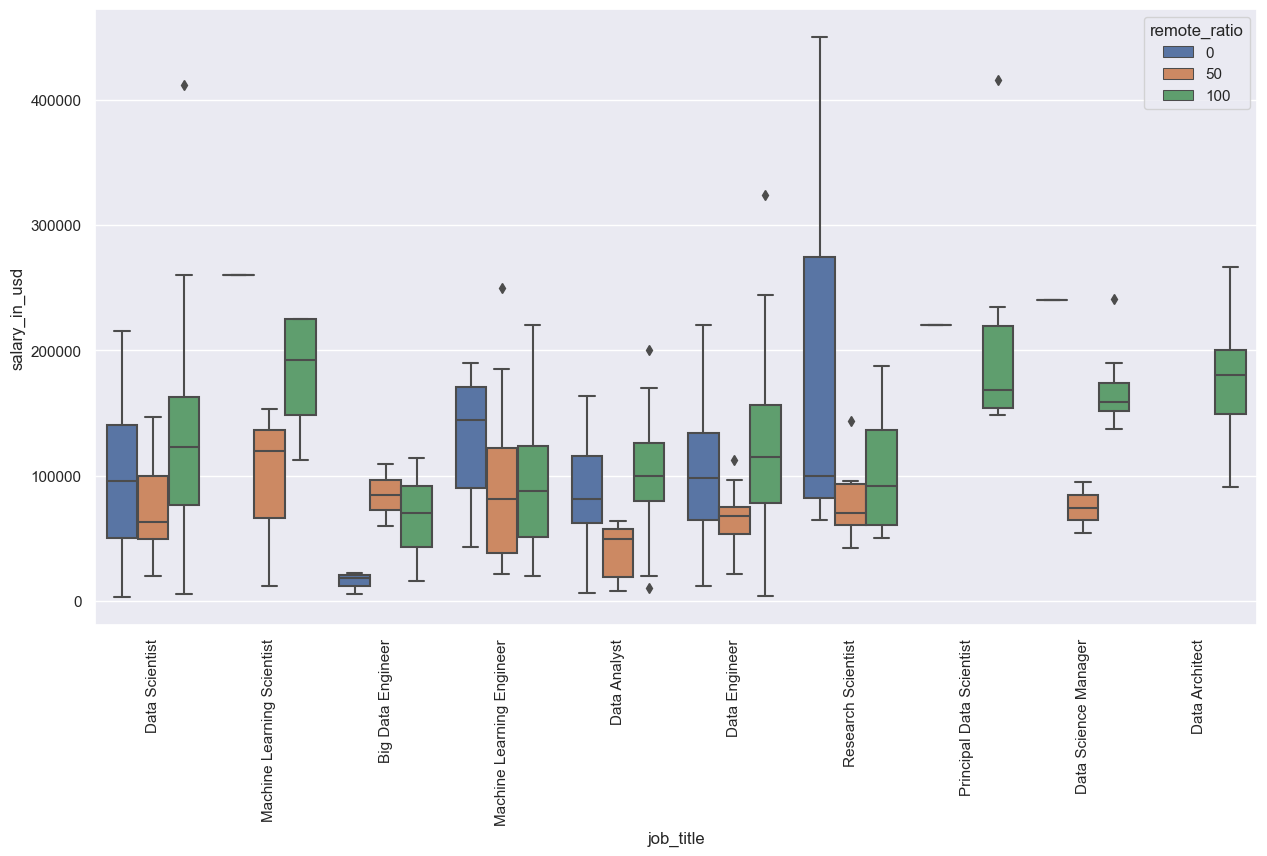

In [11]:
plt.figure(figsize=(15,8))
sns.boxplot(x="job_title", y="salary_in_usd",hue = "remote_ratio" , data=df_filtered_job_titles)
plt.xticks(x ="job_title" ,rotation ='vertical')

In [12]:
first_10_company_location =  df['company_location'].value_counts()[:10].keys()
df_filtered_company_location = df[df['company_location'].isin(first_10_company_location)]

plt.figure(figsize=(15,8))
sns.boxplot(x="company_location", y="salary_in_usd", data=df_filtered_company_location)

<AxesSubplot:xlabel='company_location', ylabel='salary_in_usd'>

In [13]:
plt.figure(figsize=(15,8))
sns.jointplot(x="remote_ratio", y="salary_in_usd", data=df, kind="reg")

<Figure size 1500x800 with 0 Axes>

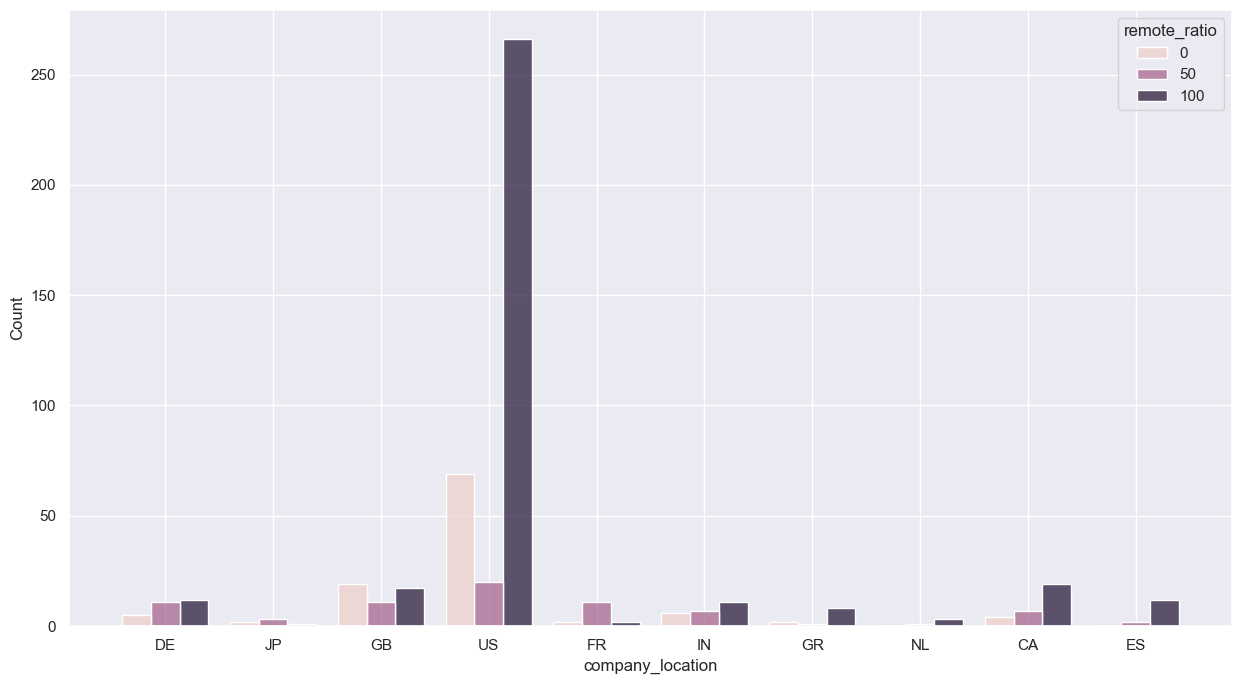

In [14]:
plt.figure(figsize=(15,8))
ax = sns.histplot(x="company_location", hue="remote_ratio", data=df_filtered_company_location ,multiple="dodge", shrink=.8)

In [15]:
x,y = 'company_location', 'remote_ratio'

g = (df_filtered_company_location
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
g.fig.set_size_inches(15,8)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


In [16]:
from sklearn.preprocessing import OneHotEncoder
def category_to_column(df, column, prefix=''):
    df_copy = df.copy()
    oe_style = OneHotEncoder()
    oe_results = oe_style.fit_transform(df_copy[[column]])
    name_columns = prefix + oe_style.categories_[0]
    temp = pd.DataFrame(oe_results.toarray(), columns=name_columns, index=df_copy.index)
    df_copy = pd.concat([df_copy, temp], axis=1)
    return df_copy

In [17]:
columns_category = ['experience_level', 'employment_type', 'salary_currency', 'company_size']
df_v2 = df.copy()
for column in columns_category:
    df_v2 = category_to_column(df_v2, column)
df_v2 = df_v2.drop(columns=columns_category)
df_v2.head()

Unnamed: 0  work_year                   job_title  salary  salary_in_usd  \
0           0       2020              Data Scientist   70000          79833   
1           1       2020  Machine Learning Scientist  260000         260000   
2           2       2020           Big Data Engineer   85000         109024   
3           3       2020        Product Data Analyst   20000          20000   
4           4       2020   Machine Learning Engineer  150000         150000   

  employee_residence  remote_ratio company_location   EN   EX  ...  INR  JPY  \
0                 DE             0               DE  0.0  0.0  ...  0.0  0.0   
1                 JP             0               JP  0.0  0.0  ...  0.0  0.0   
2                 GB            50               GB  0.0  0.0  ...  0.0  0.0   
3                 HN             0               HN  0.0  0.0  ...  0.0  0.0   
4                 US            50               US  0.0  0.0  ...  0.0  0.0   

   MXN  PLN  SGD  TRY  USD    L    M    S  
0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
3  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  
4  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  

[5 rows x 36 columns]

In [18]:
df_v3 = df_v2.drop(columns=['job_title', 'salary', 'employee_residence', 'company_location'])
df_v3.head()

Unnamed: 0  work_year  salary_in_usd  remote_ratio   EN   EX   MI   SE  \
0           0       2020          79833             0  0.0  0.0  1.0  0.0   
1           1       2020         260000             0  0.0  0.0  0.0  1.0   
2           2       2020         109024            50  0.0  0.0  0.0  1.0   
3           3       2020          20000             0  0.0  0.0  1.0  0.0   
4           4       2020         150000            50  0.0  0.0  0.0  1.0   

    CT   FL  ...  INR  JPY  MXN  PLN  SGD  TRY  USD    L    M    S  
0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
1  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  
2  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
3  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  
4  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  

[5 rows x 32 columns]

In [19]:
corr = df.corr()
sns.set(style='darkgrid')
%matplotlib inline
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

<AxesSubplot:>

<AxesSubplot:>

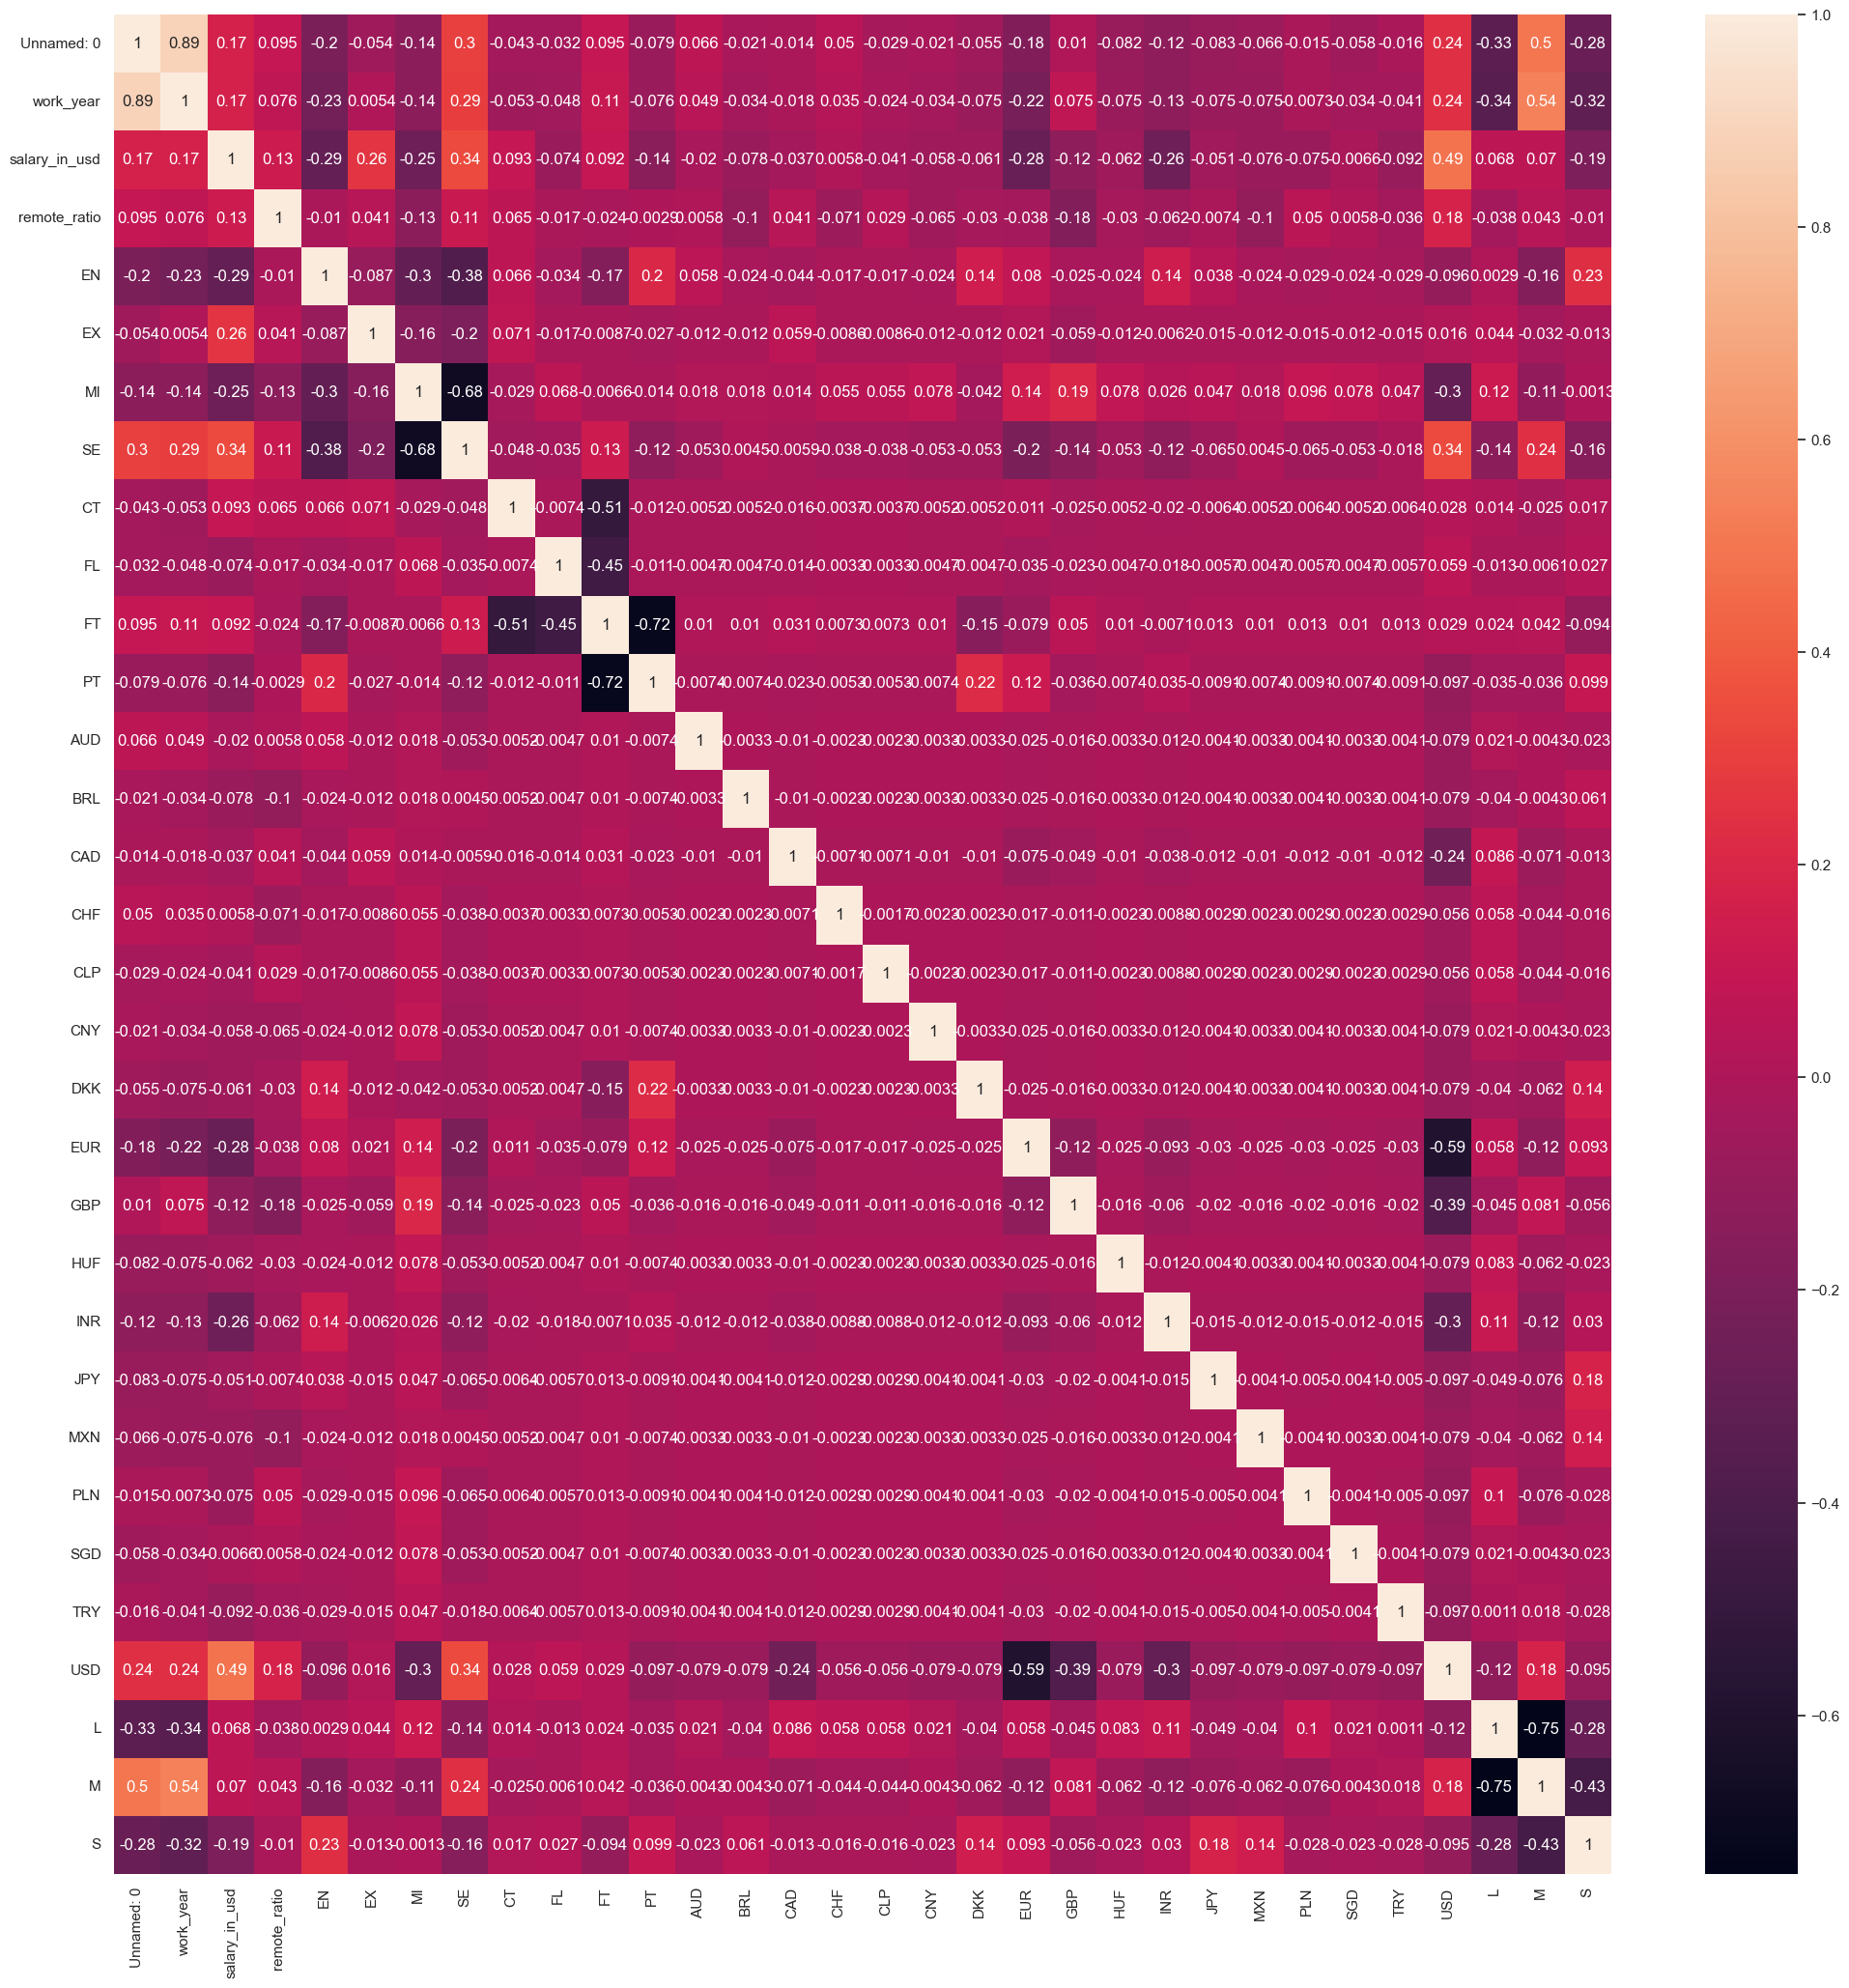

In [20]:
corr = df_v3.corr()
sns.set(style='darkgrid')
%matplotlib inline
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True)

In [21]:
from sklearn.preprocessing import StandardScaler

feature = df_v3.drop(columns=['salary_in_usd'])
target = df_v3['salary_in_usd']

scaler = StandardScaler()
scaler.fit(feature)
feature_scaled = scaler.transform(feature)
feature_scaled = pd.DataFrame(feature_scaled, columns=feature.columns, index=feature.index)
feature_scaled.head()

Unnamed: 0  work_year  remote_ratio        EN        EX        MI  \
0   -1.729200  -2.032024     -1.743615 -0.411773 -0.211543  1.360061   
1   -1.723493  -2.032024     -1.743615 -0.411773 -0.211543 -0.735261   
2   -1.717786  -2.032024     -0.514377 -0.411773 -0.211543 -0.735261   
3   -1.712079  -2.032024     -1.743615 -0.411773 -0.211543  1.360061   
4   -1.706372  -2.032024     -0.514377 -0.411773 -0.211543 -0.735261   

         SE        CT        FL        FT  ...       INR       JPY       MXN  \
0 -0.925348 -0.091135 -0.081446  0.179758  ... -0.215758 -0.070476 -0.057496   
1  1.080674 -0.091135 -0.081446  0.179758  ... -0.215758 -0.070476 -0.057496   
2  1.080674 -0.091135 -0.081446  0.179758  ... -0.215758 -0.070476 -0.057496   
3 -0.925348 -0.091135 -0.081446  0.179758  ... -0.215758 -0.070476 -0.057496   
4  1.080674 -0.091135 -0.081446  0.179758  ... -0.215758 -0.070476 -0.057496   

        PLN       SGD       TRY       USD         L         M         S  
0 -0.070476 -0.057496 -0.070476 -1.379966  1.437239 -1.077099 -0.397991  
1 -0.070476 -0.057496 -0.070476  0.724656 -0.695778 -1.077099  2.512619  
2 -0.070476 -0.057496 -0.070476 -1.379966 -0.695778  0.928420 -0.397991  
3 -0.070476 -0.057496 -0.070476  0.724656 -0.695778 -1.077099  2.512619  
4 -0.070476 -0.057496 -0.070476  0.724656  1.437239 -1.077099 -0.397991  

[5 rows x 31 columns]

In [22]:
scaler_target = StandardScaler()
target_scaled = scaler_target.fit_transform(target.values.reshape(-1, 1))
target_scaled[0:10]

array([[-0.45790445],
       [ 2.08328151],
       [-0.04617667],
       [-1.30182581],
       [ 0.53177399],
       [-0.56838589],
       [ 1.09595854],
       [-1.07988971],
       [ 0.32020478],
       [ 0.17915864]])

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_scaled , target_scaled, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
mean_squared_error(y_test, y_predict)

0.3819424805407622

In [25]:
from sklearn import linear_model
model = linear_model.ARDRegression()

model.fit(X_train, y_train)
y_predict = model.predict(X_test)
mean_squared_error(y_test, y_predict)

C:\Users\HV7\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.38711367595172336

In [26]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='linear', input_dim=X_train.shape[1]),
     keras.layers.Dense(256 ,kernel_initializer='random_uniform', activation='sigmoid', use_bias=False),
    keras.layers.Dense(1,  kernel_initializer='random_uniform', activation='linear', use_bias=False)
  ])
model.compile(loss='mean_squared_error', optimizer='adam')
result = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
16/16 [==============================] - 1s 18ms/step - loss: 0.9179 - val_loss: 0.4799
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.7075 - val_loss: 0.3882
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6419 - val_loss: 0.4013
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6447 - val_loss: 0.4132
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6340 - val_loss: 0.4196
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6233 - val_loss: 0.3612
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6232 - val_loss: 0.3894
Epoch 8/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6153 - val_loss: 0.4037
Epoch 9/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6313 - val_loss: 0.3757
Epoch 10/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6122 - val_loss: 0.3982
Epoch 11

16/16 [==============================] - 0s 4ms/step - loss: 0.5709 - val_loss: 0.3742
Epoch 84/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5710 - val_loss: 0.3826
Epoch 85/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5703 - val_loss: 0.3750
Epoch 86/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5678 - val_loss: 0.3861
Epoch 87/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5657 - val_loss: 0.3958
Epoch 88/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5628 - val_loss: 0.4219
Epoch 89/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6008 - val_loss: 0.4616
Epoch 90/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5738 - val_loss: 0.4179
Epoch 91/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5703 - val_loss: 0.4098
Epoch 92/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5768 - val_loss: 0.3956
Epoch 93/100


Text(0, 0.5, 'Cost')

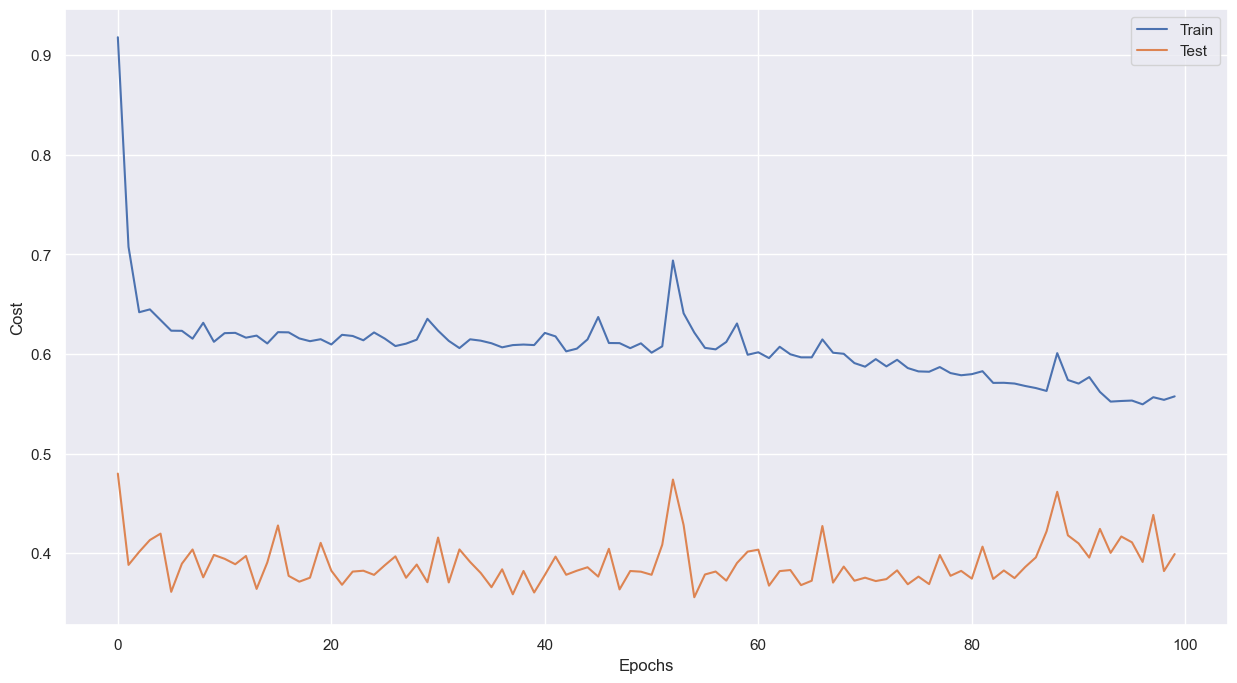

In [27]:
plt.figure(figsize=(15,8))
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.legend(['Train', 'Test'])
plt.xlabel('Epochs')
plt.ylabel('Cost')